<a href="https://colab.research.google.com/github/nrajmalwar/Project/blob/master/Session%204/Fourth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nishad Rajmalwar, Batch F6, nrajmalwar@gmail.com

###Planning and Expectations###

1.   Our aim is to reach above 99.4% accuracy in this model.
2. We also want our model to train faster, hence we use a bigger batch size. But a bigger batch size also requires tuning the learning rate. We try several values of the learning to suit our higher batch size.
3. We use LRscheduler to change the value of learning rate with each epoch. We decrease it by a factor of some percentage of the previous epoch value.
4. We experiment with different optimizers like Adam or SGD to find better results.

# **Import Libraries and modules**

Install and import keras library

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Important important APIs, functions and libraries

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

### Load pre-shuffled MNIST data into train and test sets

Load and split the data into training and test set

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Print the shape of X_train (examples of the dataset) and plot the first image

(60000, 28, 28)


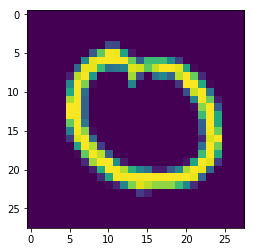

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[108])

Reshape the X_train and X_test to (m,  28, 28, 1) tensor

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Change the values of X_train, X_test to float32 and normalize them between 0 and 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Print the first 10 elements of y_train which contains the class labels for X_train

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert the values of Y_train and Y_test to one-hot vectors

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Model Building

Build a simple convolution model

In [29]:
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # Output size = 26; Receptive Field = 3
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24; 5
model.add(BatchNormalization())

model.add(Convolution2D(20, 3, 3, activation='relu')) # 22; 7
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11; 14

model.add(Convolution2D(10, 1, 1, activation='relu')) # 11; 16
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9; 18
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 7; 20
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(20, 3, 3, activation='relu')) # 5; 22
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/

Print the model summary

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_14 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_15 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 22, 22, 20)        2900      
_________________________________________________________________
batch_normalization_16 (Batc (None, 22, 22, 20)        80        
_________________________________________________________________
dropout_5 (Dropout)          (None, 22, 22, 20)        0         
__________

Compile the model with the loss function, the optimizer and the metrics used

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

#Model Training

Fit the model on X_train and Y_train for 10 epochs with a batch size of 32

In [32]:
model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 9s 143us/step - loss: 0.2032 - acc: 0.9350 - val_loss: 0.1033 - val_acc: 0.9709
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 105us/step - loss: 0.0563 - acc: 0.9827 - val_loss: 0.0505 - val_acc: 0.9837
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 105us/step - loss: 0.0419 - acc: 0.9868 - val_loss: 0.0493 - val_acc: 0.9858
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 7s 112us/step - loss: 0.0344 - acc: 0.9892 - val_loss: 0.0382 - val_acc: 0.9888
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [======

#Model Evaluation

Evaluate the model on the test set

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print the evaluation score of the model

In [34]:
print(score)

[0.030127466949369228, 0.9934]


#Model Prediction

Use the model to predict the class labels of test set

In [0]:
y_pred = model.predict(X_test)

Compare the predicted values and the actual values

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.14254814e-10 7.75933131e-08 2.12016388e-07 9.98408538e-08
  2.32986563e-13 6.14065909e-10 7.17573755e-17 9.99999642e-01
  3.23628581e-12 1.29152522e-09]
 [2.32894331e-06 1.78988252e-04 9.99815643e-01 3.00066773e-07
  3.43109207e-07 1.42385581e-09 2.09503037e-06 9.21276833e-09
  2.16923567e-07 2.49902959e-10]
 [1.68343455e-08 9.99996781e-01 1.18230910e-08 4.80276041e-09
  4.00783136e-07 1.56326465e-07 1.59692263e-07 2.42549891e-06
  4.31139746e-08 1.27029480e-07]
 [9.99976516e-01 1.56706506e-08 1.14408058e-05 9.34513800e-09
  3.03197396e-08 8.63075229e-08 1.07154337e-05 2.50079317e-08
  4.77361404e-08 1.19856134e-06]
 [6.96602314e-08 1.37526149e-05 2.37304093e-07 9.46317025e-10
  9.99949455e-01 2.67112665e-09 3.19970139e-09 1.38210507e-05
  4.71867123e-09 2.26952980e-05]
 [3.97485458e-08 9.99993086e-01 3.95063751e-08 4.76623985e-09
  6.76039519e-07 1.58762745e-08 4.43472743e-08 6.05280820e-06
  3.16506146e-08 1.13516030e-07]
 [5.66494975e-08 7.03865022e-04 6.73631803e-05 3.04958718e

###Results###
1. Our model reaches 99.41 validation accuracy by the 25th epoch. Our target is reached. We expected our model to perform even better but it did not. However, the model reaches accuracy of above 99.3 more often, which means this model is more stable to achieve a higher accuracy consistently. Also, now each epoch is just 6 seconds compared to the previous time of 39 seconds.
2. We tried using a initial learning rate of 0.003 and 0.001, and 0.003 works better.
3. We tried several batch sizes from 32, 64, 128, 256 to 512. This model performs good for 64 batch size but takes around 20 seconds to complete each epoch. With 256 and 512, the model trains very fast, just 3-4 seconds per epoch, however it starts overfitting on the training set and does not reach the target accuracy. We also tried reducing the learning rate for these batch sizes, but there was no improvement. The batch size of 128 works best in terms of performance and time taken.
4. We try similar experminents with SGD optimizer but the initial few epochs itself start with very low accuracy compared to Adam, so we can conclude that Adam works better in this case.